In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/train

Mounted at /gdrive
/gdrive/My Drive/train


In [ ]:
from scipy.io import loadmat
import numpy as np, os, sys, joblib
import matplotlib.pyplot as plt
import scipy.signal as signal
import math
from tqdm import tqdm
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
import sklearn
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools


SEED = 1234
np.random.seed(SEED)
pd.core.common._random_stat = SEED
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [ ]:
from sklearn.model_selection import train_test_split
import os
import re

In [ ]:
path_to_data = "/gdrive/My Drive/train"

In [ ]:
# @title Preprocessing

#Utility: given the filename of a signal it returns the sampling frequency
def ppg_freq(filename):
  if '128' in filename:
    return 128
  else:
    return 250

In [ ]:
# @title Preprocessing
def load_data(file):

  original = loadmat(file) #  dictionary with variable names as keys, and loaded matrices as values

  spk_file = file.replace('.mat', '_spk.mat')
  spk = loadmat(spk_file)

  ann_file = file.replace('.mat', '_ann.mat')
  ann = loadmat(ann_file)

  return original, spk, ann

In [ ]:
def filter_files_by_pattern(directory, pattern):
    """
    Filter files in a directory based on a specified pattern.

    Parameters:
    - directory: The directory containing the files.
    - pattern: The regular expression pattern to match filenames.

    Returns:
    - List of filenames matching the pattern.
    """
    files = os.listdir(directory)
    filtered_files = [file for file in files if re.match(pattern, file)]
    return filtered_files

In [ ]:
directory = path_to_data
pattern = r'S\d{3}_\d{3}\.mat'  # Regular expression pattern matching 'SXXX_YYY.mat'

filtered_files = filter_files_by_pattern(directory, pattern)
print(filtered_files)

['S001_128.mat', 'S002_128.mat', 'S003_128.mat', 'S004_128.mat', 'S005_128.mat', 'S006_128.mat', 'S007_128.mat', 'S008_128.mat', 'S009_128.mat', 'S010_128.mat', 'S011_128.mat', 'S012_128.mat', 'S013_128.mat', 'S014_128.mat', 'S015_128.mat', 'S016_128.mat', 'S017_128.mat', 'S018_128.mat', 'S019_128.mat', 'S020_128.mat', 'S021_128.mat', 'S022_128.mat', 'S023_128.mat', 'S024_128.mat', 'S025_128.mat', 'S026_128.mat', 'S027_128.mat', 'S028_128.mat', 'S029_128.mat', 'S030_128.mat', 'S031_128.mat', 'S032_128.mat', 'S033_128.mat', 'S034_128.mat', 'S035_128.mat', 'S036_128.mat', 'S037_128.mat', 'S038_128.mat', 'S039_128.mat', 'S040_128.mat', 'S041_128.mat', 'S042_128.mat', 'S043_128.mat', 'S044_128.mat', 'S045_128.mat', 'S046_128.mat', 'S047_128.mat', 'S048_128.mat', 'S049_128.mat', 'S050_128.mat', 'S051_128.mat', 'S052_128.mat', 'S053_128.mat', 'S054_128.mat', 'S055_128.mat', 'S056_128.mat', 'S057_128.mat', 'S058_128.mat', 'S059_128.mat', 'S060_128.mat', 'S061_128.mat', 'S062_128.mat', 'S079_2

In [ ]:
type(filtered_files)
len(filtered_files)

105

In [ ]:
data = []
ppg_data = []
spk_data = []
ann_data = []

for file in filtered_files:
  ppg, spk, ann = load_data(path_to_data + '/' + file)
  ppg_data.append(ppg)
  spk_data.append(spk)
  ann_data.append(ann)

  data.append(path_to_data + '/' + file)

In [ ]:
ppg_data

[{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue Nov  7 09:57:28 2023',
  '__version__': '1.0',
  '__globals__': [],
  'ppg': array([[-2.38138363],
         [-2.38135063],
         [-2.38131159],
         ...,
         [-3.93333424],
         [-4.06168546],
         [-4.2308891 ]])},
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue Nov  7 09:57:28 2023',
  '__version__': '1.0',
  '__globals__': [],
  'ppg': array([[-1.62433622],
         [-1.62433622],
         [-1.62433622],
         ...,
         [-1.7324762 ],
         [-1.27083778],
         [-1.31682689]])},
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue Nov  7 09:57:28 2023',
  '__version__': '1.0',
  '__globals__': [],
  'ppg': array([[-2.42002693],
         [-2.4200018 ],
         [-2.41997314],
         ...,
         [-2.41322432],
         [-2.41333122],
         [-2.41343626]])},
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue 

In [ ]:
# Function to check if all annotations are 'N'
def all_annotations_N(annotations):
    labels = annotations.get('labels', [])
    return all(label == 'N' for label in labels)

# Collect file names with all 'N' annotations
files_with_all_N = [os.path.basename(data[i]) for i, ann in enumerate(ann_data) if all_annotations_N(ann)]

# Print file names with all 'N' annotations
print("Files with all 'N' annotations:", files_with_all_N)

Files with all 'N' annotations: ['S085_250.mat', 'S092_250.mat', 'S095_250.mat', 'S096_250.mat', 'S104_250.mat', 'S105_250.mat', 'S107_250.mat', 'S108_250.mat', 'S110_250.mat', 'S111_250.mat', 'S115_250.mat', 'S119_250.mat', 'S120_250.mat', 'S121_250.mat']


In [ ]:
files_with_all_N

['S085_250.mat',
 'S092_250.mat',
 'S095_250.mat',
 'S096_250.mat',
 'S104_250.mat',
 'S105_250.mat',
 'S107_250.mat',
 'S108_250.mat',
 'S110_250.mat',
 'S111_250.mat',
 'S115_250.mat',
 'S119_250.mat',
 'S120_250.mat',
 'S121_250.mat']

In [ ]:
count_files_with_all_N = len(files_with_all_N)
count_files_with_all_N


14

In [ ]:
import scipy.io
# Load the .mat file
mat_file_path = '/gdrive/My Drive/train/S121_250_ann.mat'
mat_contents = scipy.io.loadmat(mat_file_path)

# Extract the 'labels' data
labels_data = mat_contents['labels']

# Display the contents of 'labels'
print(labels_data[2200:2500])  # View the first 100 entries


['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N

In [ ]:
filtered_files_updated = [file for file in filtered_files if os.path.basename(file) not in files_with_all_N]

# Print the updated list of filtered files
print("Updated filtered files:", filtered_files_updated)

Updated filtered files: ['S001_128.mat', 'S002_128.mat', 'S003_128.mat', 'S004_128.mat', 'S005_128.mat', 'S006_128.mat', 'S007_128.mat', 'S008_128.mat', 'S009_128.mat', 'S010_128.mat', 'S011_128.mat', 'S012_128.mat', 'S013_128.mat', 'S014_128.mat', 'S015_128.mat', 'S016_128.mat', 'S017_128.mat', 'S018_128.mat', 'S019_128.mat', 'S020_128.mat', 'S021_128.mat', 'S022_128.mat', 'S023_128.mat', 'S024_128.mat', 'S025_128.mat', 'S026_128.mat', 'S027_128.mat', 'S028_128.mat', 'S029_128.mat', 'S030_128.mat', 'S031_128.mat', 'S032_128.mat', 'S033_128.mat', 'S034_128.mat', 'S035_128.mat', 'S036_128.mat', 'S037_128.mat', 'S038_128.mat', 'S039_128.mat', 'S040_128.mat', 'S041_128.mat', 'S042_128.mat', 'S043_128.mat', 'S044_128.mat', 'S045_128.mat', 'S046_128.mat', 'S047_128.mat', 'S048_128.mat', 'S049_128.mat', 'S050_128.mat', 'S051_128.mat', 'S052_128.mat', 'S053_128.mat', 'S054_128.mat', 'S055_128.mat', 'S056_128.mat', 'S057_128.mat', 'S058_128.mat', 'S059_128.mat', 'S060_128.mat', 'S061_128.mat',

In [ ]:
len(filtered_files_updated)

91

In [ ]:
# Initialize counters
count_128 = 0
count_250 = 0

# Iterate over the list of filenames and count frequencies
for filename in filtered_files_updated:
    freq = ppg_freq(filename)
    if freq == 128:
        count_128 += 1
    elif freq == 250:
        count_250 += 1

# Print the results
print(f"Number of files with 128 Hz sampling frequency: {count_128}")
print(f"Number of files with 250 Hz sampling frequency: {count_250}")

Number of files with 128 Hz sampling frequency: 62
Number of files with 250 Hz sampling frequency: 29


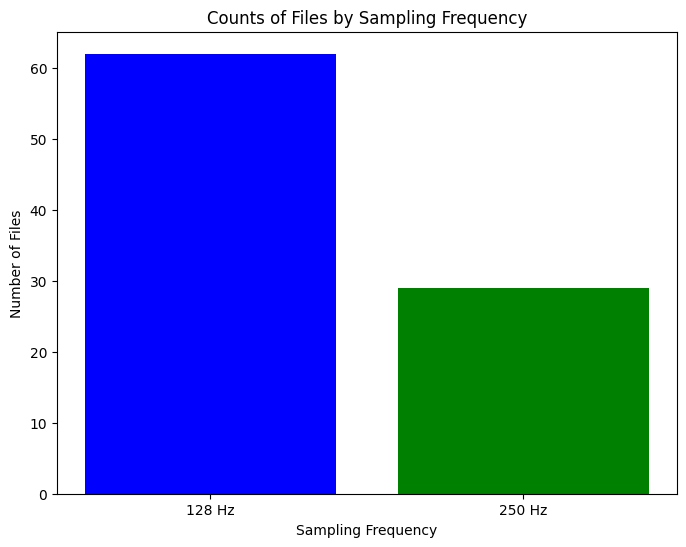

In [ ]:
# Plot the counts
frequencies = ['128 Hz', '250 Hz']
counts = [count_128, count_250]

plt.figure(figsize=(8, 6))
plt.bar(frequencies, counts, color=['blue', 'green'])
plt.xlabel('Sampling Frequency')
plt.ylabel('Number of Files')
plt.title('Counts of Files by Sampling Frequency')
plt.show()

In [ ]:
# List to store the percentage of 'N' annotations for each file
n_annotations_percentage = []

# Process each file in filtered_files_updated
for file in filtered_files_updated:
    _, _, ann = load_data(path_to_data + '/' + file)
    labels = ann.get('labels', [])
    if len(labels) > 0:
        n_count = np.sum(labels == 'N')
        total_count = len(labels)
        percentage_n = (n_count / total_count) * 100
        n_annotations_percentage.append(percentage_n)

# Compute statistics
max_n_percentage = np.max(n_annotations_percentage)
min_n_percentage = np.min(n_annotations_percentage)
median_n_percentage = np.median(n_annotations_percentage)
average_n_percentage = np.mean(n_annotations_percentage)
total_n_percentage = np.sum(n_annotations_percentage)

# Print statistics
print(f"Maximum percentage of 'N' annotations: {max_n_percentage:.2f}%")
print(f"Minimum percentage of 'N' annotations: {min_n_percentage:.2f}%")
print(f"Median percentage of 'N' annotations: {median_n_percentage:.2f}%")
print(f"Average percentage of 'N' annotations: {average_n_percentage:.2f}%")
print(f"Total percentage of 'N' annotations: {total_n_percentage:.2f}%")

Maximum percentage of 'N' annotations: 99.97%
Minimum percentage of 'N' annotations: 35.04%
Median percentage of 'N' annotations: 96.54%
Average percentage of 'N' annotations: 92.40%
Total percentage of 'N' annotations: 8408.34%


In [ ]:
# Determine the threshold, for example using the median
threshold = np.median(n_annotations_percentage)

# Group patients based on the threshold
dominantly_n_files = [file for i, file in enumerate(filtered_files_updated) if n_annotations_percentage[i] >= threshold]
few_n_files = [file for i, file in enumerate(filtered_files_updated) if n_annotations_percentage[i] < threshold]

# Print the threshold and grouped files
print(f"Threshold for percentage of 'N' annotations: {threshold:.2f}%")
print(f"Files with dominantly 'N' annotations: {dominantly_n_files}")
print(f"Files with fewer 'N' annotations: {few_n_files}")

Threshold for percentage of 'N' annotations: 96.54%
Files with dominantly 'N' annotations: ['S003_128.mat', 'S006_128.mat', 'S013_128.mat', 'S015_128.mat', 'S017_128.mat', 'S022_128.mat', 'S023_128.mat', 'S024_128.mat', 'S028_128.mat', 'S033_128.mat', 'S035_128.mat', 'S037_128.mat', 'S038_128.mat', 'S042_128.mat', 'S046_128.mat', 'S050_128.mat', 'S055_128.mat', 'S056_128.mat', 'S059_128.mat', 'S060_128.mat', 'S061_128.mat', 'S079_250.mat', 'S080_250.mat', 'S081_250.mat', 'S082_250.mat', 'S083_250.mat', 'S084_250.mat', 'S087_250.mat', 'S088_250.mat', 'S089_250.mat', 'S090_250.mat', 'S091_250.mat', 'S093_250.mat', 'S094_250.mat', 'S097_250.mat', 'S098_250.mat', 'S099_250.mat', 'S100_250.mat', 'S101_250.mat', 'S103_250.mat', 'S109_250.mat', 'S112_250.mat', 'S113_250.mat', 'S114_250.mat', 'S116_250.mat', 'S118_250.mat']
Files with fewer 'N' annotations: ['S001_128.mat', 'S002_128.mat', 'S004_128.mat', 'S005_128.mat', 'S007_128.mat', 'S008_128.mat', 'S009_128.mat', 'S010_128.mat', 'S011_128

In [ ]:
len(dominantly_n_files), len(few_n_files)

(46, 45)

In [ ]:
# Function to split data into train, test, and validation sets
def split_data(files, train_size=0.7, test_size=0.2, val_size=0.1):
    train_files, test_val_files = train_test_split(files, train_size=train_size, random_state=42)
    test_files, val_files = train_test_split(test_val_files, test_size=val_size/(test_size + val_size), random_state=42)
    return train_files, test_files, val_files

# Split each group
dominantly_n_train, dominantly_n_test, dominantly_n_val = split_data(dominantly_n_files)
few_n_train, few_n_test, few_n_val = split_data(few_n_files)

# Combine the groups
train_files = dominantly_n_train + few_n_train
test_files = dominantly_n_test + few_n_test
val_files = dominantly_n_val + few_n_val

# Print the number of files in each set
print(f"Number of training files: {len(train_files)}")
print(f"Number of testing files: {len(test_files)}")
print(f"Number of validation files: {len(val_files)}")


Number of training files: 63
Number of testing files: 18
Number of validation files: 10


In [ ]:
train = []
ppg_train = []
spk_train = []
ann_train = []


for file in train_files:
  ppg, spk, ann = load_data(path_to_data + '/' + file)
  ppg_train.append(ppg)
  spk_train.append(spk)
  ann_train.append(ann)

  train.append(path_to_data + '/' + file)

In [ ]:
testing = []
ppg_testing = []
spk_testing = []
ann_testing = []

for file in test_files:

  ppg, spk, ann = load_data(path_to_data + '/' + file)
  ppg_testing.append(ppg)
  spk_testing.append(spk)
  ann_testing.append(ann)

  testing.append(path_to_data + '/' + file)

In [ ]:
validation = []
ppg_validation = []
spk_validation = []
ann_validation = []

for file in val_files:

  ppg, spk, ann = load_data(path_to_data + '/' + file)
  ppg_validation.append(ppg)
  spk_validation.append(spk)
  ann_validation.append(ann)

  validation.append(path_to_data + '/' + file)

Counts of each label: {'N': 136867, 'S': 5345, 'V': 5658}


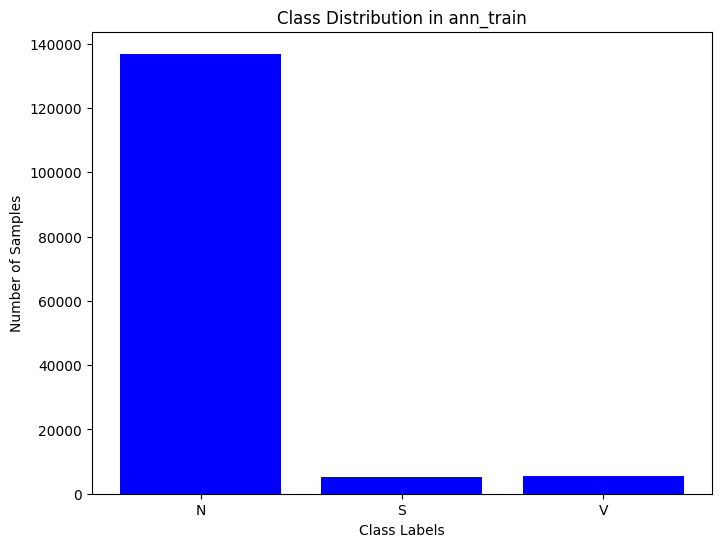

In [ ]:
from collections import Counter
import numpy as np

# Initialize an empty Counter to hold label counts
label_counter = Counter()

# Iterate through each dictionary in ann_train
for ann in ann_train:
    labels = ann['labels']
    # Update the counter with labels from the current dictionary
    label_counter.update(labels)

# Print the total counts for each label
print("Counts of each label:", dict(label_counter))

# Optionally, convert the Counter to a dictionary and plot the counts
labels, counts = zip(*label_counter.items())

# Plotting the counts
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='blue')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in ann_train')
plt.show()

In [ ]:
! pip install neurokit2 tdqm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.2/689.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1323 sha256=878e0f00f244a16249a9ea9b6403be9436a662a1011a399419530e2b3f41921f
  Stored in directory: /root/.cache/pip/wheels/37/31/b8/7b711038035720ba0df14376af06e5e76b9bd61759c861ad92
Successfully built tdqm


In [ ]:
import scipy

In [ ]:
def normalize(data):
    return (data - np.mean(data)) / np.std(data)


In [ ]:
# Resample and normalize to 250 Hz training PPG signals
normalized_ppg_1_train = []
for i in range(len(ppg_train)):
    original_fs = ppg_freq(train[i])
    if original_fs != 250:
        resampled = signal.resample_poly(ppg_train[i]['ppg'][:, 0], 250, original_fs)
    else:
        resampled = ppg_train[i]['ppg'][:, 0]
    normalized = normalize(resampled)
    normalized_ppg_1_train.append(normalized)

# Resample and normalize to 250 Hz validation PPG signals
normalized_ppg_1_validation = []
for i in range(len(ppg_validation)):
    original_fs = ppg_freq(validation[i])
    if original_fs != 250:
        resampled = signal.resample_poly(ppg_validation[i]['ppg'][:, 0], 250, original_fs)
    else:
        resampled = ppg_validation[i]['ppg'][:, 0]
    normalized = normalize(resampled)
    normalized_ppg_1_validation.append(normalized)


# Resample and normalize to 250 Hz training PPG signals
normalized_ppg_1_testing = []
for i in range(len(ppg_testing)):
    original_fs = ppg_freq(testing[i])
    if original_fs != 250:
        resampled = signal.resample_poly(ppg_testing[i]['ppg'][:, 0], 250, original_fs)
    else:
        resampled = ppg_testing[i]['ppg'][:, 0]
    normalized = normalize(resampled)
    normalized_ppg_1_testing.append(normalized)

# Define the Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

# Apply the Butterworth filter to the signal
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = signal.lfilter(b, a, data)
    return y



In [ ]:
# Filter parameters
lowcut = 0.5
highcut = 8.0
fs = 250

In [ ]:
# Apply the Butterworth filter to normalized training data
filtered_ppg_1_train = []
for i in range(len(normalized_ppg_1_train)):
    filtered_ppg_1_train.append(butter_bandpass_filter(normalized_ppg_1_train[i], lowcut, highcut, fs))

# Apply the Butterworth filter to normalized validation data
filtered_ppg_1_validation = []
for i in range(len(normalized_ppg_1_validation)):
    filtered_ppg_1_validation.append(butter_bandpass_filter(normalized_ppg_1_validation[i], lowcut, highcut, fs))

# Apply the Butterworth filter to normalized testing data
filtered_ppg_1_testing = []
for i in range(len(normalized_ppg_1_testing)):
    filtered_ppg_1_testing.append(butter_bandpass_filter(normalized_ppg_1_testing[i], lowcut, highcut, fs))

# Function to plot PPG signals
def plot_ppgg_signals(subject_index, xlim=(0, 1000), ylim=(-5, 5)):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(normalized_ppg_1_train[subject_index], label='Normalized 250Hz')
    plt.title(f'Subject {subject_index + 1}: {train_files[subject_index]} - Resampled PPG')
    plt.title(f'Subject {subject_index + 1}: Normalized PP')
    plt.legend()
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.subplot(2, 1, 2)
    plt.plot(filtered_ppg_1_train[subject_index], label='Filtered 0.5-10Hz')
    plt.title(f'Subject {subject_index + 1}: Filtered PPG')
    plt.legend()
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.tight_layout()
    plt.show()


In [ ]:
def from_freq_to_freq(sample, ini_freq, freq = 250):
   secs = sample/ini_freq # Number of seconds in signal X
   samp = secs*freq       # Number of samples to downsample
   return int(samp)

In [ ]:
win = 250

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

# Resampling and Filtering ppg Data
resampled_ppg_1_train = filtered_ppg_1_train
resampled_ppg_1_validation = filtered_ppg_1_validation
resampled_ppg_1_testing = filtered_ppg_1_testing

In [ ]:

resampled_ppg_1_train = filtered_ppg_1_train
resampled_ppg_1_validation = filtered_ppg_1_validation
resampled_ppg_1_testing = filtered_ppg_1_testing

(-10.0, 10.0)

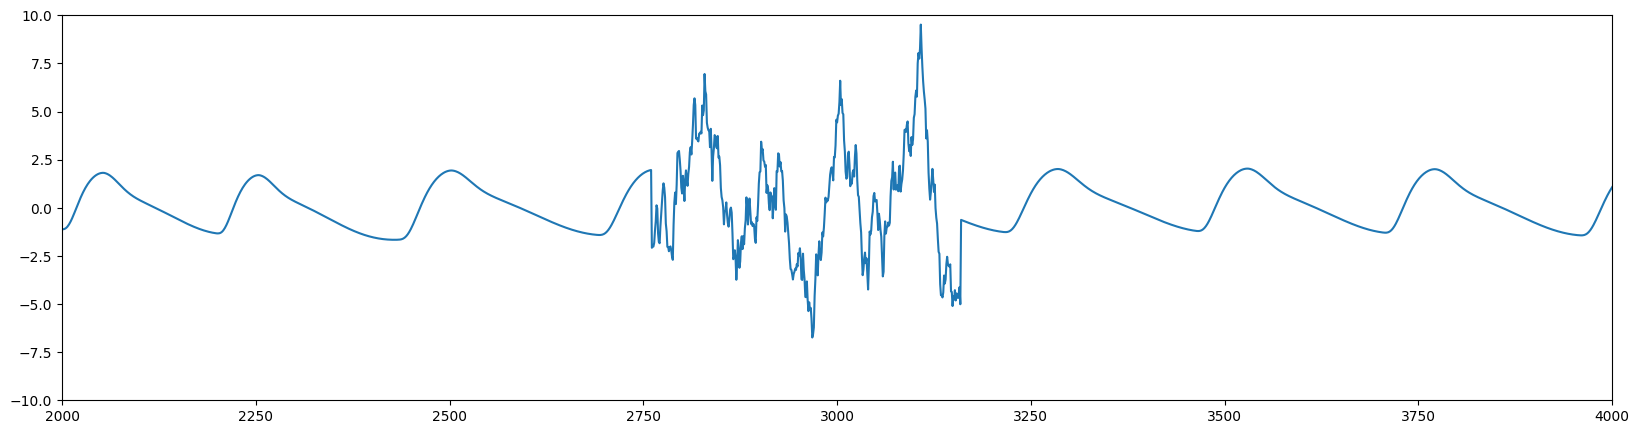

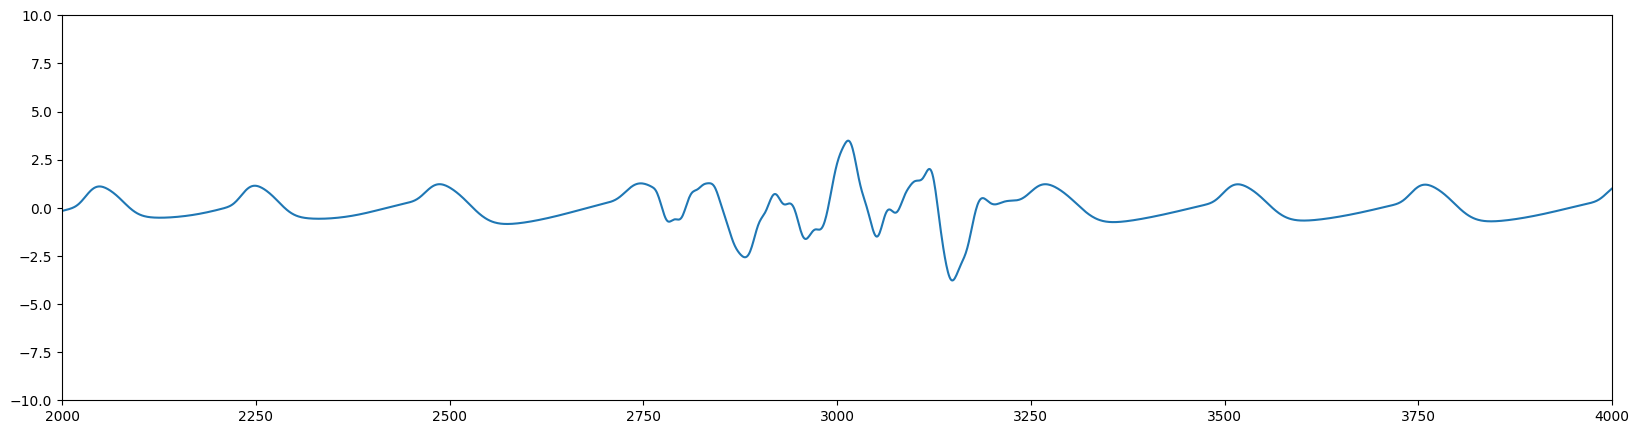

In [ ]:
# Plotting the Effect of Denoising
x = 11
plt.figure(figsize=(20, 5))
plt.plot(ppg_train[x]['ppg'][:,0])
plt.xlim(2000, 4000)
plt.ylim(-10,10)
plt.figure(figsize=(20, 5))
plt.plot(resampled_ppg_1_train[x])
plt.xlim(2000, 4000)
plt.ylim(-10,10)

In [ ]:
# Extracting Heartbeats
heartbeats_train_1 = []
heartbeats_validation_1 = []
heartbeats_testing_1 = []


In [ ]:
for i in range(len(ppg_train)):
    for j in range(len(spk_train[i]['speaks'])):
        if (from_freq_to_freq(spk_train[i]['speaks'][j], ppg_freq(ppg_train[i])) < win or
            from_freq_to_freq(spk_train[i]['speaks'][j], ppg_freq(ppg_train[i]))  + win >
            from_freq_to_freq(spk_train[i]['speaks'][-1], ppg_freq(ppg_train[i])) or
            j < 40 or
            (len(spk_train[i]['speaks']) - (j+1) < 40)):
            ann_train[i]['labels'][j] = 'A'
            spk_train[i]['speaks'][j] = 0
        else:
            heartbeats_train_1.append(
                resampled_ppg_1_train[i][from_freq_to_freq(spk_train[i]['speaks'][j], ppg_freq(ppg_train[i]))  - win :
                                         from_freq_to_freq(spk_train[i]['speaks'][j], ppg_freq(ppg_train[i]))  + win])

for i in range(len(ppg_validation)):
    for j in range(len(spk_validation[i]['speaks'])):
        if (from_freq_to_freq(spk_validation[i]['speaks'][j], ppg_freq(ppg_validation[i])) < win or
            from_freq_to_freq(spk_validation[i]['speaks'][j], ppg_freq(ppg_validation[i]))  + win >
            from_freq_to_freq(spk_validation[i]['speaks'][-1], ppg_freq(ppg_validation[i])) or
            j < 40 or
            (len(spk_validation[i]['speaks']) - (j+1) < 40)):
            ann_validation[i]['labels'][j] = 'A'
            spk_validation[i]['speaks'][j] = 0
        else:
            heartbeats_validation_1.append(
                resampled_ppg_1_validation[i][from_freq_to_freq(spk_validation[i]['speaks'][j], ppg_freq(ppg_validation[i]))  - win :
                                             from_freq_to_freq(spk_validation[i]['speaks'][j], ppg_freq(ppg_validation[i]))  + win])

for i in range(len(ppg_testing)):
    for j in range(len(spk_testing[i]['speaks'])):
        if (from_freq_to_freq(spk_testing[i]['speaks'][j], ppg_freq(ppg_testing[i])) < win or
            from_freq_to_freq(spk_testing[i]['speaks'][j], ppg_freq(ppg_testing[i]))  + win >
            from_freq_to_freq(spk_testing[i]['speaks'][-1], ppg_freq(ppg_testing[i])) or
            j < 40 or
            (len(spk_testing[i]['speaks']) - (j+1) < 40)):
            ann_testing[i]['labels'][j] = 'A'
            spk_testing[i]['speaks'][j] = 0
        else:
            heartbeats_testing_1.append(
                resampled_ppg_1_testing[i][from_freq_to_freq(spk_testing[i]['speaks'][j], ppg_freq(ppg_testing[i]))  - win :
                                          from_freq_to_freq(spk_testing[i]['speaks'][j], ppg_freq(ppg_testing[i]))  + win])

<ipython-input-36-ead6d838464d>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(samp)


In [ ]:
# Amplitude Filtering
high_amplitude_peaks = []
low_amplitude_peaks = []

for i in range(len(heartbeats_train_1)):
    max_val = np.max(heartbeats_train_1[i])
    min_val = np.min(heartbeats_train_1[i])
    peak_to_peak_amplitude = max_val - min_val

    if peak_to_peak_amplitude > 5:
        high_amplitude_peaks.append(peak_to_peak_amplitude)
    else:
        low_amplitude_peaks.append(peak_to_peak_amplitude)



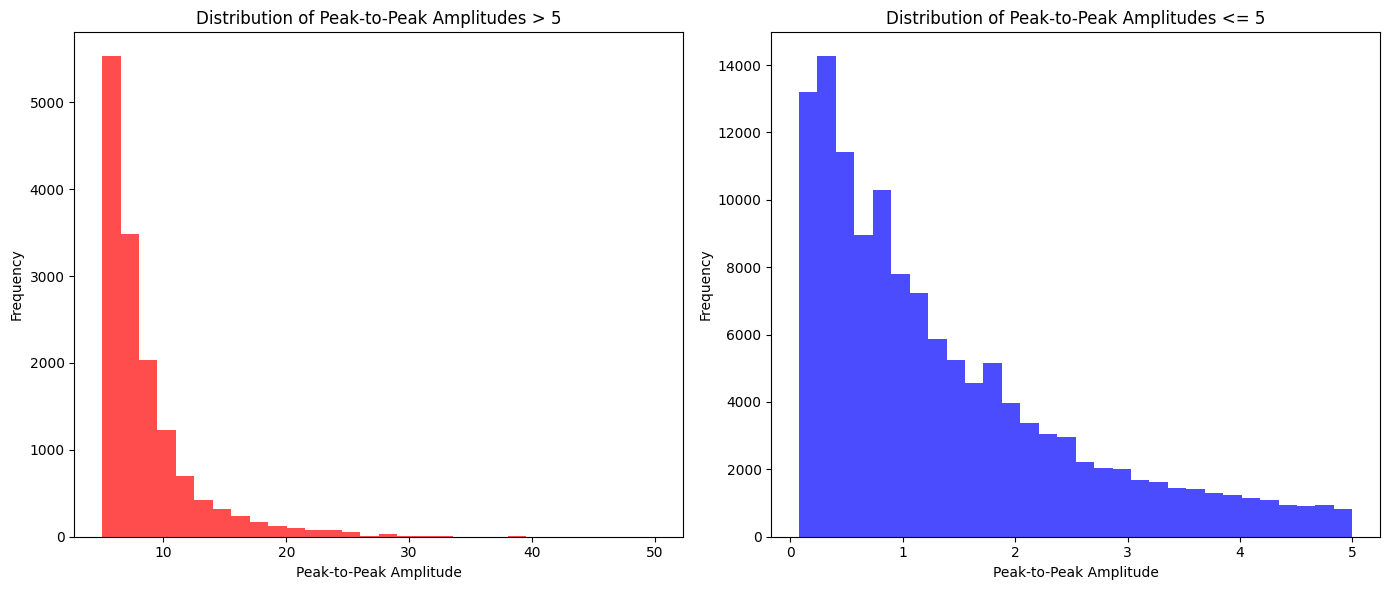

In [ ]:
# Plotting Amplitude Distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(high_amplitude_peaks, bins=30, color='r', alpha=0.7)
plt.title('Distribution of Peak-to-Peak Amplitudes > 5')
plt.xlabel('Peak-to-Peak Amplitude')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(low_amplitude_peaks, bins=30, color='b', alpha=0.7)
plt.title('Distribution of Peak-to-Peak Amplitudes <= 5')
plt.xlabel('Peak-to-Peak Amplitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [ ]:
# Filtering Labels and Preparing Valid Heartbeats
labels_train = []
labels_validation = []
labels_testing = []

for i in range(len(ppg_train)):
    for j in range(len(ann_train[i]['labels'])):
        if ann_train[i]['labels'][j] != 'A':
            labels_train.append(ann_train[i]['labels'][j])


for i in range(len(ppg_validation)):
    for j in range(len(ann_validation[i]['labels'])):
        if ann_validation[i]['labels'][j] != 'A':
            labels_validation.append(ann_validation[i]['labels'][j])

for i in range(len(ppg_testing)):
    for j in range(len(ann_testing[i]['labels'])):
        if ann_testing[i]['labels'][j] != 'A':
            labels_testing.append(ann_testing[i]['labels'][j])


In [ ]:
# Adjusting Labels for Binary Classification
labels_train = ['N' if label == 'N' else 'SV' for label in labels_train]
labels_validation = ['N' if label == 'N' else 'SV' for label in labels_validation]
labels_testing = ['N' if label == 'N' else 'SV' for label in labels_testing]

In [ ]:
# One-Hot Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_train)

ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_train = ohe.fit_transform(integer_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Similar encoding for validation and testing datasets
integer_encoded_val = label_encoder.transform(labels_validation).reshape(-1, 1)
target_ohe_val = ohe.transform(integer_encoded_val)

integer_encoded_test = label_encoder.transform(labels_testing).reshape(-1, 1)
target_ohe_test = ohe.transform(integer_encoded_test)

In [ ]:
# Data Padding
win = 250  # Assume window size is 250
X_train_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_train_1, maxlen=win * 2, dtype='float32', truncating='post', padding="post")
X_test_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_testing_1, maxlen=win * 2, dtype='float32', truncating='post', padding="post")
X_val_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_validation_1, maxlen=win * 2, dtype='float32', truncating='post', padding="post")

X_train = np.asarray(X_train_1)
X_test = np.asarray(X_test_1)
X_val = np.asarray(X_val_1)


In [ ]:
# Model Preparation and Training
SEED = 42
vgg = tf.keras.Sequential()

vgg.add(tf.keras.layers.Conv1D(input_shape=(win * 2, 1), filters=32, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2))
vgg.add(tf.keras.layers.Flatten())
vgg.add(tf.keras.layers.Dense(units=1024, activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Dense(units=2, activation="softmax", kernel_initializer=tf.keras.initializers.GlorotUniform(SEED)))

vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from collections import Counter

# Count occurrences of each class in labels_train
class_distribution_train = Counter(labels_train)
print("Training Data Class Distribution:")
print(class_distribution_train)

Training Data Class Distribution:
Counter({'N': 132187, 'SV': 10643})


In [ ]:
# Define Weighted Accuracy Metric
def weighted_accuracy(y_true, y_pred):
    class_weights = tf.constant([1.0, 1.0])  # Adjust weights based on your class distribution
    y_true = tf.cast(tf.argmax(y_true, axis=-1), tf.float32)
    y_pred = tf.cast(tf.argmax(y_pred, axis=-1), tf.float32)
    weights = tf.gather(class_weights, tf.cast(y_true, tf.int32))
    weighted_acc = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), tf.float32) * weights) / tf.reduce_sum(weights)
    return weighted_acc

In [ ]:
total_samples = len(labels_train)

class_weight_N = total_samples / (2 * 132187)  # Total samples / (2 * number of 'N' samples)
class_weight_SV = total_samples / (2 * 10643)  # Total samples / (2 * number of 'SV' samples)

class_weights = {0: class_weight_N, 1: class_weight_SV}

print("Manual Class Weights:", class_weights)


Manual Class Weights: {0: 0.5402573626756035, 1: 6.710044160481067}


In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Define Balanced Accuracy Metric
def balanced_accuracy(y_true, y_pred):
    y_true_cls = tf.argmax(y_true, axis=-1)
    y_pred_cls = tf.argmax(y_pred, axis=-1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true_cls, y_pred_cls)

    # Calculate balanced accuracy from confusion matrix
    per_class_acc = np.diag(cm) / np.sum(cm, axis=1)
    balanced_acc = np.mean(per_class_acc)

    return balanced_acc


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import ModelCheckpoint

# Define Weighted Accuracy Metric
def weighted_accuracy(y_true, y_pred):
    class_weights = tf.constant([1.0, 132187/10643])  # Adjust weights based on your class distribution
    y_true = tf.cast(tf.argmax(y_true, axis=-1), tf.float32)
    y_pred = tf.cast(tf.argmax(y_pred, axis=-1), tf.float32)
    weights = tf.gather(class_weights, tf.cast(y_true, tf.int32))
    weighted_acc = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), tf.float32) * weights) / tf.reduce_sum(weights)
    return weighted_acc

# Define Balanced Accuracy Metric
def balanced_accuracy(y_true, y_pred):
    y_true_cls = tf.argmax(y_true, axis=-1)
    y_pred_cls = tf.argmax(y_pred, axis=-1)

    # Calculate confusion matrix
    cm = tf.math.confusion_matrix(y_true_cls, y_pred_cls)

    # Calculate balanced accuracy from confusion matrix
    per_class_acc = tf.linalg.tensor_diag_part(cm) / tf.reduce_sum(cm, axis=1)
    balanced_acc = tf.reduce_mean(per_class_acc)

    return balanced_acc

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

# Define checkpoint callback
checkpoint_path = "/content/drive/My Drive/train/model_vgg1.h5"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

# Compile the model with weighted accuracy and balanced accuracy as metrics
vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', weighted_accuracy])

# Training the Model
history = vgg.fit(X_train, target_ohe_train,
                  epochs=5,
                  batch_size=32,
                  shuffle=True,
                  validation_data=(X_val, target_ohe_val),
                  callbacks=[checkpoint])


Epoch 1/5
4464/4464 [==============================] - ETA: 0s - loss: 0.2596 - accuracy: 0.9255 - weighted_accuracy: 0.5523
Epoch 1: val_loss improved from inf to 0.31904, saving model to /content/drive/My Drive/train/model_vgg1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4464/4464 [==============================] - 52s 9ms/step - loss: 0.2596 - accuracy: 0.9255 - weighted_accuracy: 0.5523 - val_loss: 0.3190 - val_accuracy: 0.8919 - val_weighted_accuracy: 0.6189
Epoch 2/5
4463/4464 [============================>.] - ETA: 0s - loss: 0.2520 - accuracy: 0.9257 - weighted_accuracy: 0.5533
Epoch 2: val_loss did not improve from 0.31904
4464/4464 [==============================] - 34s 8ms/step - loss: 0.2520 - accuracy: 0.9257 - weighted_accuracy: 0.5533 - val_loss: 0.3235 - val_accuracy: 0.8919 - val_weighted_accuracy: 0.6206
Epoch 3/5
4462/4464 [============================>.] - ETA: 0s - loss: 0.2499 - accuracy: 0.9264 - weighted_accuracy: 0.5593
Epoch 3: val_loss did not improve from 0.31904
4464/4464 [==============================] - 35s 8ms/step - loss: 0.2499 - accuracy: 0.9264 - weighted_accuracy: 0.5594 - val_loss: 0.3233 - val_accuracy: 0.8917 - val_weighted_accuracy: 0.6244
Epoch 4/5
4459/4464 [============================>.] - ETA: 0s - loss: 0.2

In [ ]:
# Evaluating Model Performance
test_loss, test_accuracy, test_weighted_accuracy = vgg.evaluate(X_test, target_ohe_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('Test weighted accuracy:', test_weighted_accuracy)

1249/1249 [==============================] - 5s 4ms/step - loss: 0.3179 - accuracy: 0.9052 - weighted_accuracy: 0.7065
Test loss: 0.3178517520427704
Test accuracy: 0.9052242040634155
Test weighted accuracy: 0.7065027356147766


1249/1249 [==============================] - 3s 2ms/step
Confusion Matrix:
[[36176     4]
 [ 3784     4]]
Precision: 0.8668921623785515
Recall: 0.9052241793434748
Specificity: 0.9998894416804864
F1 Score: 0.8603885986024281


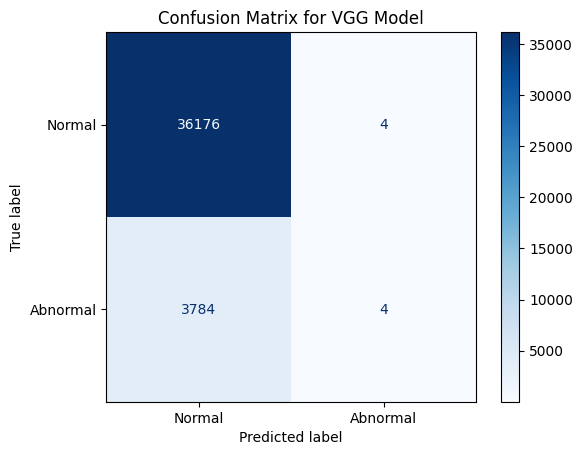

In [ ]:
# Predicting on Test Data
y_pred = vgg.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=-1)
y_true_cls = np.argmax(target_ohe_test, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true_cls, y_pred_cls)
print("Confusion Matrix:")
print(cm)

# Calculate additional metrics
precision = precision_score(y_true_cls, y_pred_cls, average='weighted')
recall = recall_score(y_true_cls, y_pred_cls, average='weighted')
specificity = specificity_score(y_true_cls, y_pred_cls)  # Calculate specificity
f1 = f1_score(y_true_cls, y_pred_cls, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('F1 Score:', f1)

# Plot confusion matrix
labels = ['Normal', 'Abnormal']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for VGG Model')
plt.show()

In [ ]:
#Saving the model
vgg.save('/gdrive/My Drive/final_model_vgg1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Predicting for test set
import os
import re
import numpy as np
import scipy.io as sio
from scipy import signal
import tensorflow as tf

# Utility functions
def ppg_freq(filename):
    if '128' in filename:
        return 128
    else:
        return 250

def load_data(file):
    original = sio.loadmat(file)
    spk_file = file.replace('.mat', '_spk.mat')
    spk = sio.loadmat(spk_file)
    return original, spk

def filter_files_by_pattern(directory, pattern):
    files = os.listdir(directory)
    filtered_files = [file for file in files if re.match(pattern, file)]
    return filtered_files

def normalize(data):
    return (data - np.mean(data)) / np.std(data)

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

def from_freq_to_freq(sample, ini_freq, freq=250):
    secs = sample / ini_freq  # Number of seconds in signal
    samp = secs * freq        # Number of samples to downsample
    return int(samp)

# Path to the test data
path_to_test_data = '/gdrive/My Drive/test_students_1'
path_to_test_output = '/gdrive/My Drive/test_output_binary'
pattern = r'S\d{3}_\d{3}\.mat'
filtered_test_files = filter_files_by_pattern(path_to_test_data, pattern)

# Load the trained model
model = tf.keras.models.load_model('/gdrive/My Drive/final_model_vgg1.h5', custom_objects={'weighted_accuracy': weighted_accuracy, 'balanced_accuracy': balanced_accuracy})

# Preprocess the test data
win = 250
lowcut = 0.5
highcut = 8.0
fs = 250

for file in filtered_test_files:
    ppg, spk = load_data(path_to_test_data + '/' + file)
    original_fs = ppg_freq(file)
    resampled = signal.resample_poly(ppg['ppg'][:, 0], 250, original_fs) if original_fs != 250 else ppg['ppg'][:, 0]
    normalized = normalize(resampled)
    filtered = butter_bandpass_filter(normalized, lowcut, highcut, fs)

    heartbeats = []
    for j in range(len(spk['speaks'])):
        if (from_freq_to_freq(spk['speaks'][j], original_fs) >= win and
            from_freq_to_freq(spk['speaks'][j], original_fs) + win <= from_freq_to_freq(spk['speaks'][-1], original_fs)):
            heartbeats.append(filtered[from_freq_to_freq(spk['speaks'][j], original_fs) - win :
                                       from_freq_to_freq(spk['speaks'][j], original_fs) + win])

    heartbeats = np.array(heartbeats)
    X_test = tf.keras.preprocessing.sequence.pad_sequences(heartbeats, maxlen=win * 2, dtype='float32', truncating='post', padding="post")

    # Predict the labels for the heartbeats
    predictions = model.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)

    # Convert numeric predictions to labels
    label_map = {0: 'N', 1: 'A'}
    predicted_labels = [label_map[label] for label in predicted_labels]

    # Save the predicted labels in the corresponding _ann file
    ann_file = file.replace('.mat', '_ann.mat')
    sio.savemat(path_to_test_output + '/' + ann_file, {'labels': predicted_labels})


<ipython-input-62-0e34dc39380e>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(samp)


2417/2417 [==============================] - 6s 3ms/step
